In [ ]:
!pip install mplfinance
!pip install ta
!pip install backtesting

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.0/75.0 kB 2.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for ta: filename=ta-0.10.2-py3-none-any.whl size=29089 sha256=3312110449de76744c512be092ad5c6b4d4eefb54c4b8456d4512683efcd42d4
  Stored in directory: /root/.cache/pip/wheels/47/51/06/380dc516ea78621870b93ff65527c251afdfdc5fa9d7f4d248
Successfully built ta
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 175.5/175.5 kB 3.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for backtesting: filename=Backtesting-0.3.3-py3-none-any.whl size=173916 sha256=c91839a6b3778bb95349d471e45fdbf6853ffad566501519ab11403ffc3ff477
  Stored in directory: /root/.cache/pip/wheels/e2/30/7f/19cbe31987c6ebdb47f1f510343249066711609e3da2d57176
Successfully built backtesting


In [ ]:
!pip install pandas_datareader

In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [ ]:
from pandas_datareader import data
tickers = ['AMZN', 'AAPL', 'WBA', 'NOC', 'BA', 'LMT', 'MCD', 'INTC', 'IBM', 'TXN', 'MA', 'MSFT', 'GE', 'AXP', 'PEP', 'KO', 'JNJ', 'TM', 'HMC', 'SNY', 'XOM', 'CVX', 'VLO', 'F', 'BAC']

In [ ]:
start_date = '2010-01-01'
end_date = '2023-10-16'
df = yf.download(tickers, start=start_date, end=end_date)['Adj Close']

[*********************100%%**********************]  25 of 25 completed


In [ ]:
df.head()

,AAPL,AMZN,AXP,BA,BAC,CVX,F,GE,HMC,IBM,...,MCD,MSFT,NOC,PEP,SNY,TM,TXN,VLO,WBA,XOM
Date,,,,,,,,,,,,,,,,,,,,,
2010-01-04,6.487533,6.6950,33.300194,43.777546,12.869791,45.955864,6.171419,68.035347,27.475611,78.345863,...,42.764194,23.522568,38.434628,41.054615,23.244360,72.314583,18.363146,10.440831,25.140755,40.983116
2010-01-05,6.498751,6.7345,33.226952,45.211342,13.288119,46.281399,6.579645,68.387611,27.285522,77.399452,...,42.437222,23.530165,38.502251,41.550701,22.948252,71.201126,18.257246,10.709296,24.938551,41.143120
2010-01-06,6.395378,6.6125,33.764046,46.582806,13.443961,46.287193,6.825779,68.035347,27.047913,76.896637,...,41.858238,23.385757,38.650982,41.135052,22.936861,72.110588,18.123098,10.977753,24.749830,41.498734
2010-01-07,6.383554,6.5000,34.311661,48.468555,13.886902,46.112820,6.999876,71.558212,26.588537,76.630493,...,42.164761,23.142561,39.049850,40.873596,22.811584,71.218132,18.179586,11.059459,24.898111,41.368332
2010-01-08,6.425996,6.6760,34.287148,48.001007,13.763864,46.194202,7.017885,73.099464,27.198406,77.399452,...,42.123898,23.302164,38.833515,40.739521,22.885609,72.892548,18.596127,10.907721,24.931818,41.202396


In [ ]:
returns = df.pct_change().mean()*(10*12)
std = df.pct_change().std()*np.sqrt((10*12))
ret_var = pd.concat([returns, std], axis = 1).dropna()
ret_var.columns = ['Mean_Returns', 'Standard Deviation']

In [ ]:
ret_var.sort_values('Standard Deviation', ascending= False)

,Returns,Standard Deviation
VLO,0.123363,0.273290
BA,0.080812,0.248638
BAC,0.053390,0.236790
F,0.049793,0.234104
AMZN,0.128599,0.228311
GE,0.040128,0.217775
INTC,0.054904,0.207544
AXP,0.072704,0.202601
WBA,0.016550,0.195800
AAPL,0.133962,0.195618


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

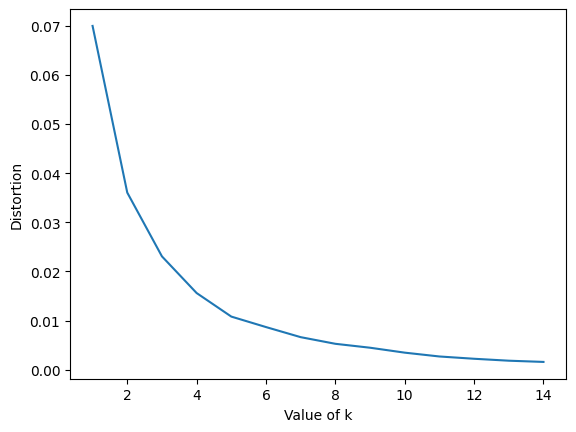

In [ ]:
X = ret_var.values
sse = []
for k in range(1, 15):
  kmeans = KMeans(n_clusters = k)
  kmeans.fit(X)
  sse.append(kmeans.inertia_)

plt.plot(range(1, 15), sse)
plt.xlabel("Value of k")
plt.ylabel("Distortion")
plt.show()

In [ ]:
from sklearn.cluster import KMeans

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


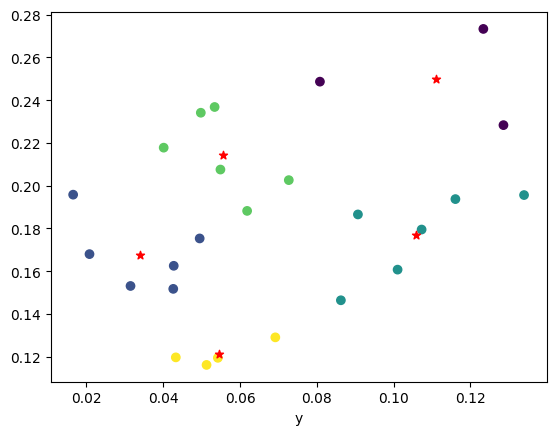

In [ ]:
kmeans = KMeans(n_clusters = 5).fit(X)
centroids = kmeans.cluster_centers_
plt.scatter(X[:, 0], X[:, 1], c=kmeans.labels_, cmap = "viridis")
plt.xlabel("y")
plt.scatter(centroids[:, 0], centroids[:, 1], color = "red", marker = "*")
plt.show()

In [ ]:
stocks = pd.DataFrame(ret_var.index)
cluster_labels = pd.DataFrame(kmeans.labels_)
stockClusters = pd.concat([stocks, cluster_labels], axis = 1)
stockClusters.columns = ['Symbol', 'Cluster']
x_df = pd.DataFrame(X, columns = ['Returns', 'Volatility'])
closerv = pd.concat([stockClusters, x_df], axis = 1)
closerv.set_index('Symbol')
closerv

,Symbol,Cluster,Returns,Volatility
0,AAPL,2,0.133962,0.195618
1,AMZN,0,0.128599,0.228311
2,AXP,3,0.072704,0.202601
3,BA,0,0.080812,0.248638
4,BAC,3,0.053390,0.236790
5,CVX,3,0.061853,0.188214
6,F,3,0.049793,0.234104
7,GE,3,0.040128,0.217775
8,HMC,1,0.020808,0.168009
9,IBM,1,0.031490,0.153114


In [ ]:
np.unique(kmeans.labels_)

array([0, 1, 2, 3, 4], dtype=int32)

In [ ]:
mean = np.zeros((len(np.unique(kmeans.labels_)), 2))
for i in np.unique(kmeans.labels_):
  mean[i] = closerv[closerv['Cluster'] == i][['Returns', 'Volatility']].mean()

In [ ]:
mean = pd.DataFrame(mean)

In [ ]:
mean.columns = ['Mean_returns', 'Mean_volatility']

In [ ]:
mean.head()

,Mean_returns,Mean_volatility
0,0.110925,0.250079
1,0.033952,0.167761
2,0.105890,0.177098
3,0.055462,0.214505
4,0.054500,0.121137


In [ ]:
mean['sharpe_ratio'] = mean['Mean_returns']-0.0471/mean['Mean_volatility']
mean.sort_values('sharpe_ratio', ascending = False)

,Mean_returns,Mean_volatility,sharpe_ratio
0,0.110925,0.250079,-0.077416
2,0.105890,0.177098,-0.160065
3,0.055462,0.214505,-0.164114
1,0.033952,0.167761,-0.246806
4,0.054500,0.121137,-0.334315


In [ ]:
required_cluster = np.argmax(mean['sharpe_ratio'])
required_cluster

0

In [ ]:
portfolio_stocks = closerv[closerv['Cluster']==required_cluster]['Symbol']

In [ ]:
portfolio_stocks

1     AMZN
3       BA
22     VLO
Name: Symbol, dtype: object

In [ ]:
portfolio_df = df[portfolio_stocks]
portfolio_df.tail()

,AMZN,BA,VLO
Date,,,
2023-10-09,128.259995,188.490005,126.949997
2023-10-10,129.479996,193.529999,130.210007
2023-10-11,131.830002,196.070007,129.600006
2023-10-12,132.330002,191.300003,126.230003
2023-10-13,129.789993,184.910004,126.050003


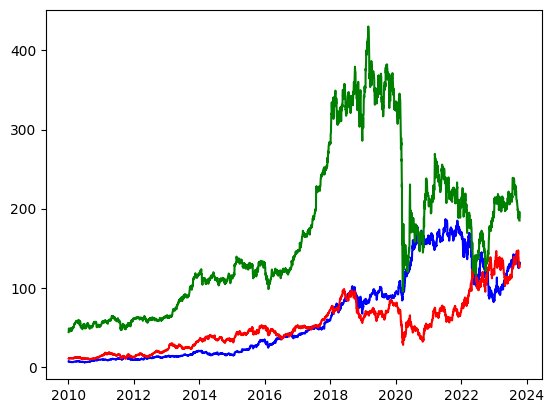

In [ ]:
plt.plot(portfolio_df['AMZN'], label='Stock1', color='blue')

# Plot Column2
plt.plot(portfolio_df['VLO'], label='Stock2', color='red')

plt.plot(portfolio_df['BA'], label='Stock3', color='green')


In [ ]:
correlation = portfolio_df['AMZN'].corr(portfolio_df['VLO'])
print(f"The correlation between the two stocks is:{correlation}")

The correlation between the two stocks is:0.6985773448058626
